<a href="https://colab.research.google.com/github/RheedWhan/SHG-analysis./blob/main/Splendor_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Brief

**Project Brief: Analyzing Booking Data for Splendor Hotel Groups (SHG)**

Greetings from Splendor Hotel Groups (SHG). As a recently recruited Business Intelligence Analyst and Data Analyst, you will be essential to our efforts to solve the puzzles buried in our booking data. Renowned hospitality company SHG aims to improve visitor experiences and streamline corporate processes by utilizing data-driven insights. Your task is to thoroughly examine one of our best resorts' past booking data in order to identify trends, comprehend consumer behavior, and offer useful suggestions for tactical decision-making.

**Project Overview**:

Your task involves a thorough analysis of a comprehensive dataset, featuring intricate details of bookings, guest demographics, distribution channels, and financial metrics. By applying your analytical prowess, we aim to extract meaningful insights that will not only inform operational improvements but also contribute to the overall success of SHG in delivering unparalleled hospitality.

**Objectives of the Analysis:**

Booking Patterns:

●	What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

●	How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

Customer Behavior Analysis:

●	Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?

●	Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

Cancellation Analysis:

●	What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?

●	How does the revenue loss from cancellations compare across different customer segments and distribution channels?

Revenue Optimization:

●	What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?

●	Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

Geographical Analysis:

●	How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?

●	Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

Operational Efficiency:

●	What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

●	Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

Impact of Deposit Types:

●	How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?

●	Can we identify any patterns in the use of deposit types across different customer segments?

Analysis of Corporate Bookings:

●	What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

●	Are there specific trends or patterns related to corporate bookings that can inform business strategies?

Time-to-Event Analysis:

●	How does the time between booking and arrival date (lead time) affect revenue and the likelihood of cancellations?

●	Are there specific lead time ranges that are associated with higher customer satisfaction or revenue?

Comparison of Online and Offline Travel Agents:

●	What is the revenue contribution of online travel agents compared to offline travel agents?

●	How do cancellation rates and revenue vary between bookings made through online and offline travel agents?

Tools and Technologies:

●	Participants are encouraged to use tools of their choice for data analysis and visualization.

Deliverables:

	Interactive and Responsive Dashboard:
●	A dynamic dashboard displaying essential metrics and KPIs.
●	Real-time updates and data filtering capabilities.

	Documentation:
●	Comprehensive documentation detailing data sources, methodologies, and actionable insights.

	Also, a Report will be okay if you can’t build a dashboard
Timeline:

●	Deadline: 1 week from project initiation.
Data Dictionary:

●	Booking ID: Unique identifier for each booking.

●	Hotel: Type or name of the hotel within the Splendor Hotel Group.

●	Booking Date: Date when the booking was made.

●	Arrival Date: Date when the guests are scheduled to arrive.

●	Lead Time: Number of days between the booking date and arrival date.

●	Nights: Number of nights the guests are booked to stay.

●	Guests: Number of guests included in the booking.

●	Distribution Channel: The channel through which the booking was made (e.g., Direct, Online Travel Agent, Offline Travel Agent).

●	Customer Type: Type of customer making the booking (e.g., Transient, Corporate).

●	Country: Country of origin of the guests.

●	Deposit Type: Whether a deposit was made for the booking (e.g., No Deposit, Deposit).

●	Avg Daily Rate: Average daily rate for the booking.

●	Status: Status of the booking (e.g., Check-Out, Canceled).

●	Status Update: Date of the last status update for the booking.

●	Canceled (0/1): Binary indicator of whether the booking was canceled (1 if canceled, 0 if not canceled).

●	Revenue: Revenue generated from the booking.

●	Revenue Loss: Loss in revenue if the booking was canceled (negative value if the booking wasn't canceled).

Good luck guys, I can't wait to see your lovely analysis and works!!!


### Summary of the Dataset

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/drive/MyDrive/my csv/drive-download-20231124T184457Z-001/SHG_Booking_Data.xlsx', index_col=False)
df.head() #print the first 5 rows of the dataset

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [4]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [5]:
df.describe() #summary of the mumerical data

,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.500000,104.011416,3.427900,1.968239,101.831122,0.370416,247.931966,-109.916242
std,34465.068657,106.863097,2.557439,0.722394,50.535790,0.482918,300.921393,277.102641
min,1.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,-63.800000,-6300.000000
25%,29848.250000,18.000000,2.000000,2.000000,69.290000,0.000000,0.000000,0.000000
50%,59695.500000,69.000000,3.000000,2.000000,94.575000,0.000000,176.000000,0.000000
75%,89542.750000,160.000000,4.000000,2.000000,126.000000,1.000000,342.977500,0.000000
max,119390.000000,737.000000,69.000000,55.000000,5400.000000,1.000000,7590.000000,0.000000


In [6]:
df.isna().sum() #check the number of missing value in each column

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

**We have 488 emoty cells in the country column. We will drop them because it's a very little fraction of the dataset**

In [7]:
# Drop missing values
df = df.dropna()

In [8]:
# checking if we still have any empty cell
df.isna().sum()

Booking ID              0
Hotel                   0
Booking Date            0
Arrival Date            0
Lead Time               0
Nights                  0
Guests                  0
Distribution Channel    0
Customer Type           0
Country                 0
Deposit Type            0
Avg Daily Rate          0
Status                  0
Status Update           0
Cancelled (0/1)         0
Revenue                 0
Revenue Loss            0
dtype: int64

In [9]:
# checking the correlation of the data
df.corr()

<ipython-input-9-77ad554eb3bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
Booking ID,1.000000,0.003123,-0.214226,-0.027147,0.144122,-0.246253,0.081801,0.226194
Lead Time,0.003123,1.000000,0.155912,0.069546,-0.066332,0.291940,0.044240,-0.054412
Nights,-0.214226,0.155912,1.000000,0.114517,0.066044,0.016963,0.490503,-0.369955
Guests,-0.027147,0.069546,0.114517,1.000000,0.365864,0.045046,0.154577,-0.180533
Avg Daily Rate,0.144122,-0.066332,0.066044,0.365864,1.000000,0.046133,0.363381,-0.290985
Cancelled (0/1),-0.246253,0.291940,0.016963,0.045046,0.046133,1.000000,-0.427545,-0.516914
Revenue,0.081801,0.044240,0.490503,0.154577,0.363381,-0.427545,1.000000,0.329184
Revenue Loss,0.226194,-0.054412,-0.369955,-0.180533,-0.290985,-0.516914,0.329184,1.000000


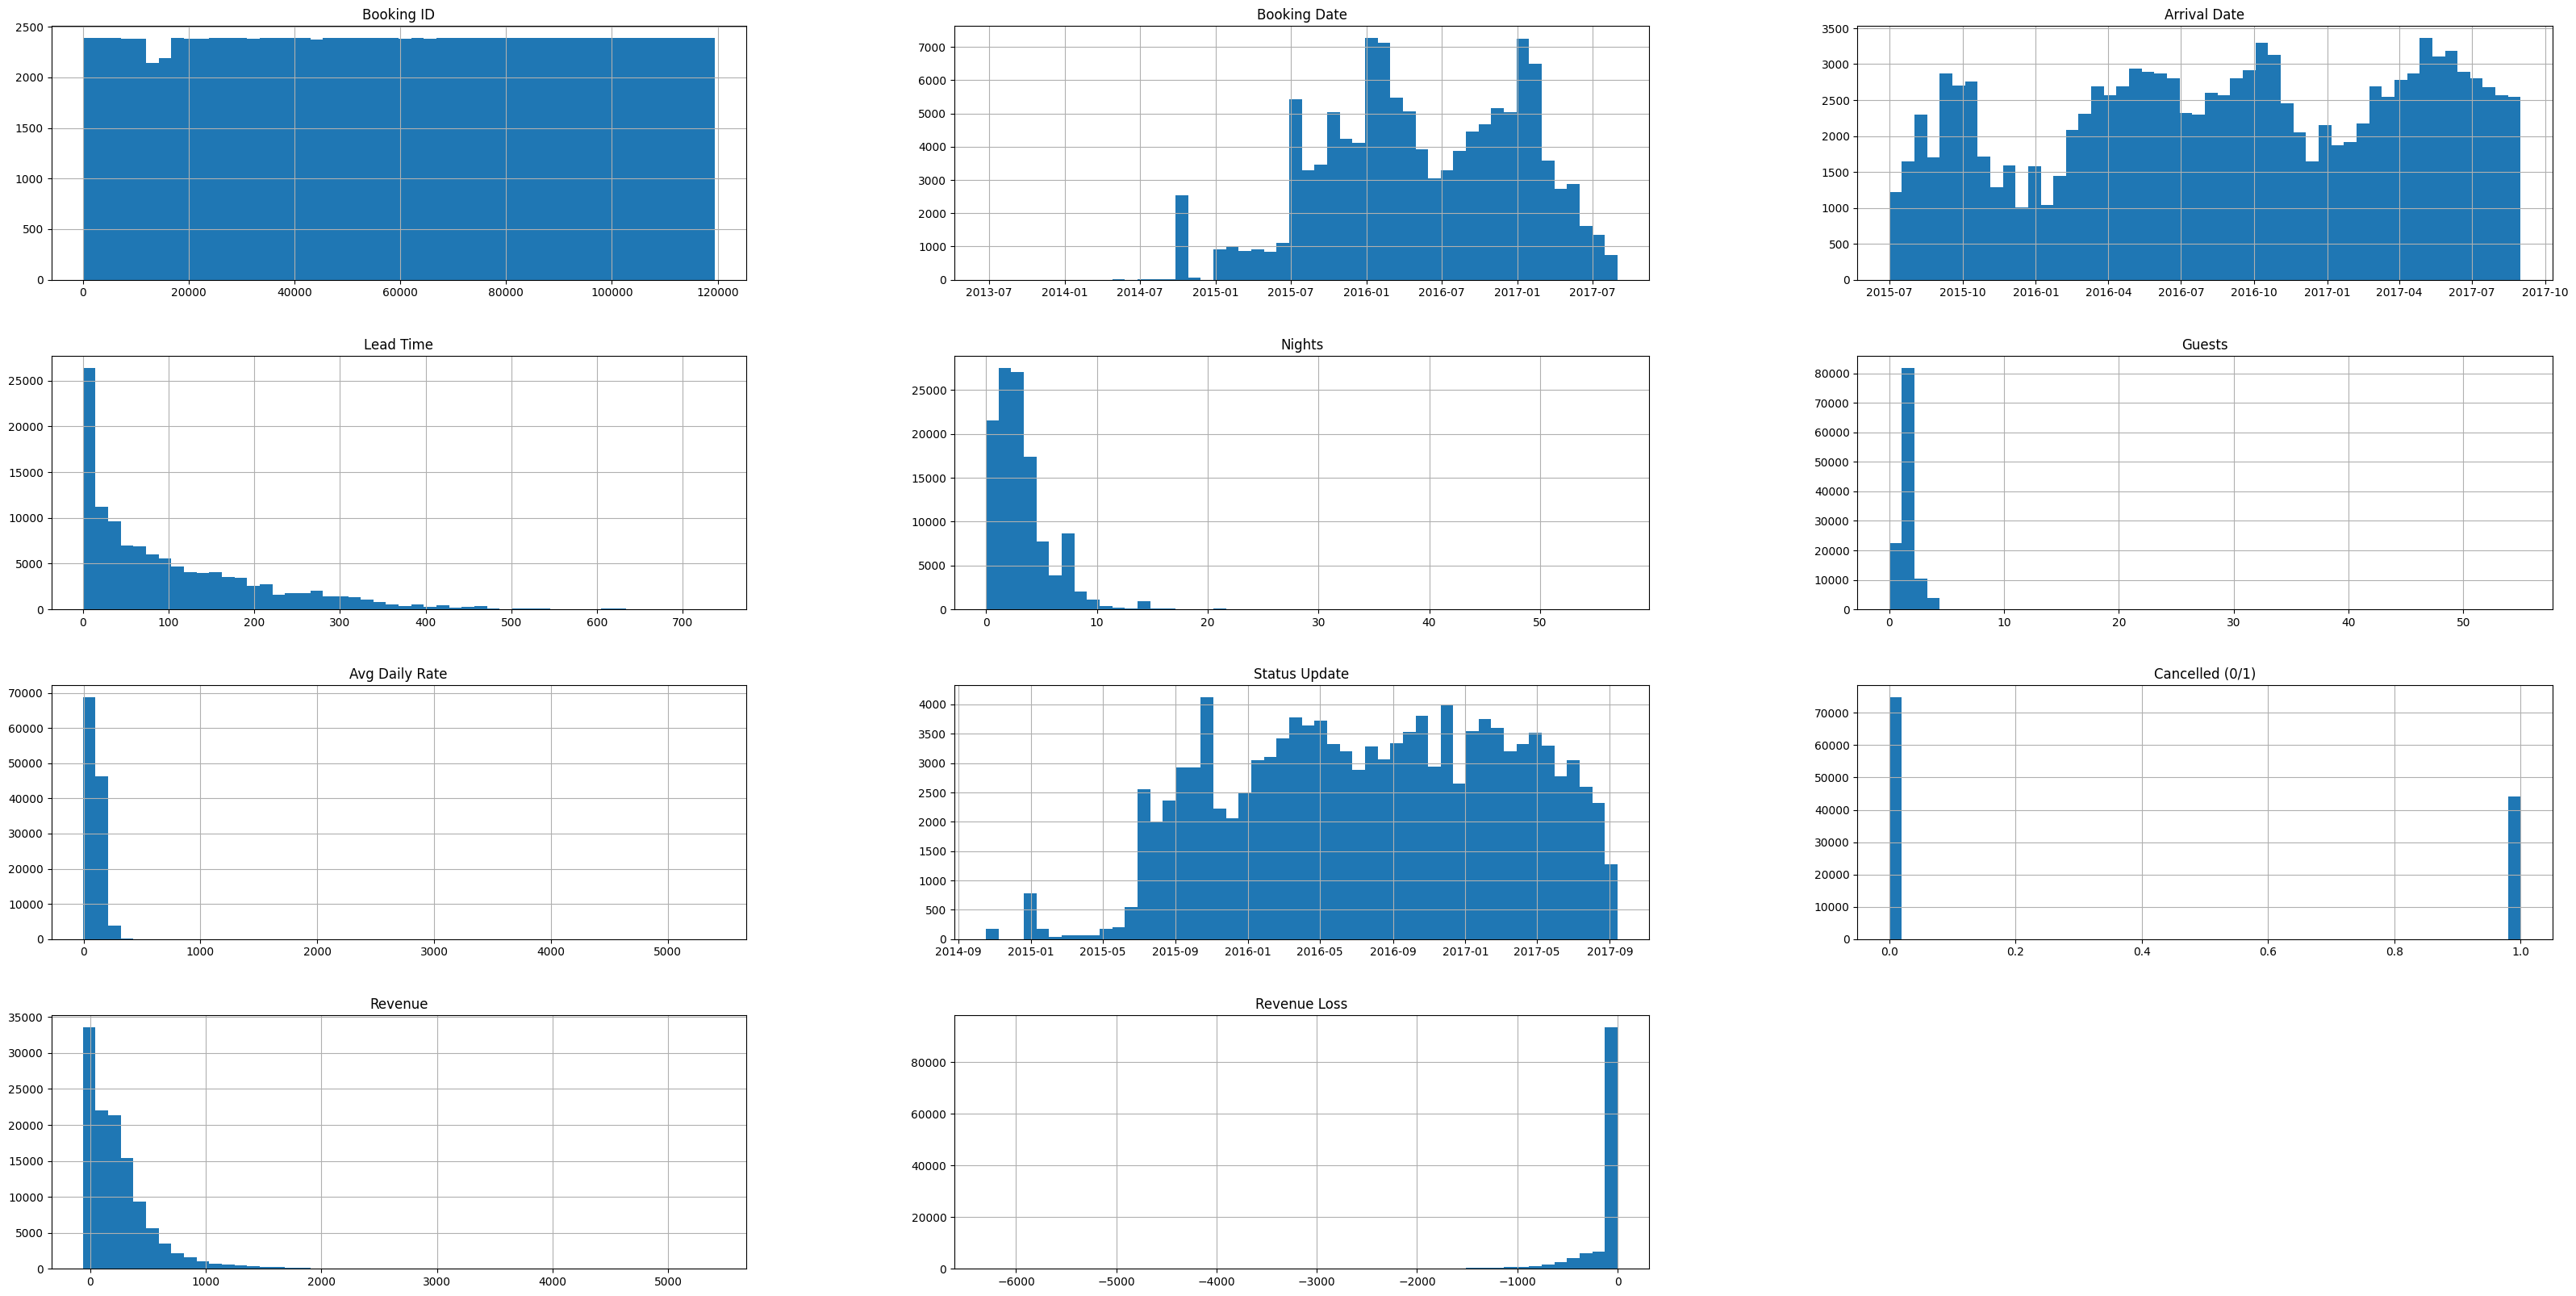

In [10]:
# visualize all data to understand the dataset better
plt.style.use("dark_background")
df.hist(bins=50, figsize=(40, 20))
plt.show()

<ipython-input-11-d7c17129c27d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


<Axes: >

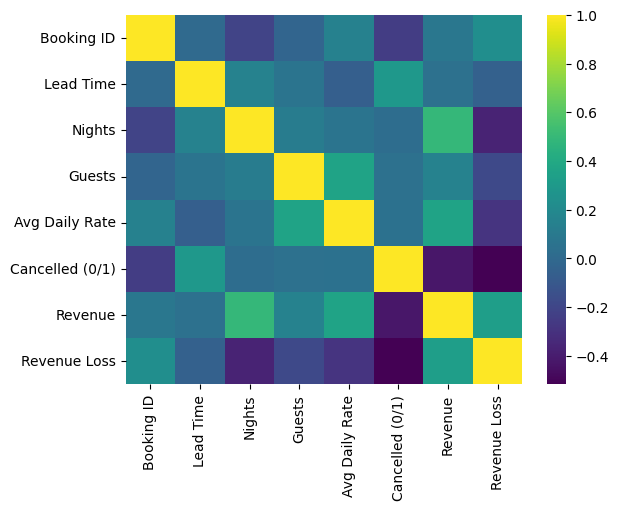

In [11]:
# visualizing the correlation
plt.style.use("dark_background")
sns.heatmap(df.corr(), cmap='viridis')

In [12]:
df[df['Avg Daily Rate'] < 0] #check if there is any negative value on the avg daily rate

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
14969,14970,Resort,2016-08-22,2017-03-05,195,10,2,Direct,Transient-Party,United Kingdom,No Deposit,-6.38,Check-Out,2017-03-15,0,-63.8,0.0


Avg Daily Rate has a negative value which is odd

In [13]:
df = df[df['Avg Daily Rate'] >= 0] #drop the negative value

In [14]:
df.describe()

,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
count,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000
mean,59873.519726,104.307264,3.430972,1.970555,102.001719,0.371376,248.195016,-110.261799
std,34418.206626,106.903253,2.544872,0.721891,50.486238,0.483175,299.556585,277.522187
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6300.000000
25%,30188.000000,18.000000,2.000000,2.000000,70.000000,0.000000,0.000000,0.000000
50%,59930.000000,69.000000,3.000000,2.000000,95.000000,0.000000,178.000000,0.000000
75%,89664.000000,161.000000,4.000000,2.000000,126.000000,1.000000,344.000000,0.000000
max,119390.000000,737.000000,57.000000,55.000000,5400.000000,1.000000,5400.000000,0.000000


In [15]:
df[df['Revenue Loss'] < 0]['Cancelled (0/1)'].value_counts() #there are revenue losses only on cancelled bookings

1    29474
Name: Cancelled (0/1), dtype: int64

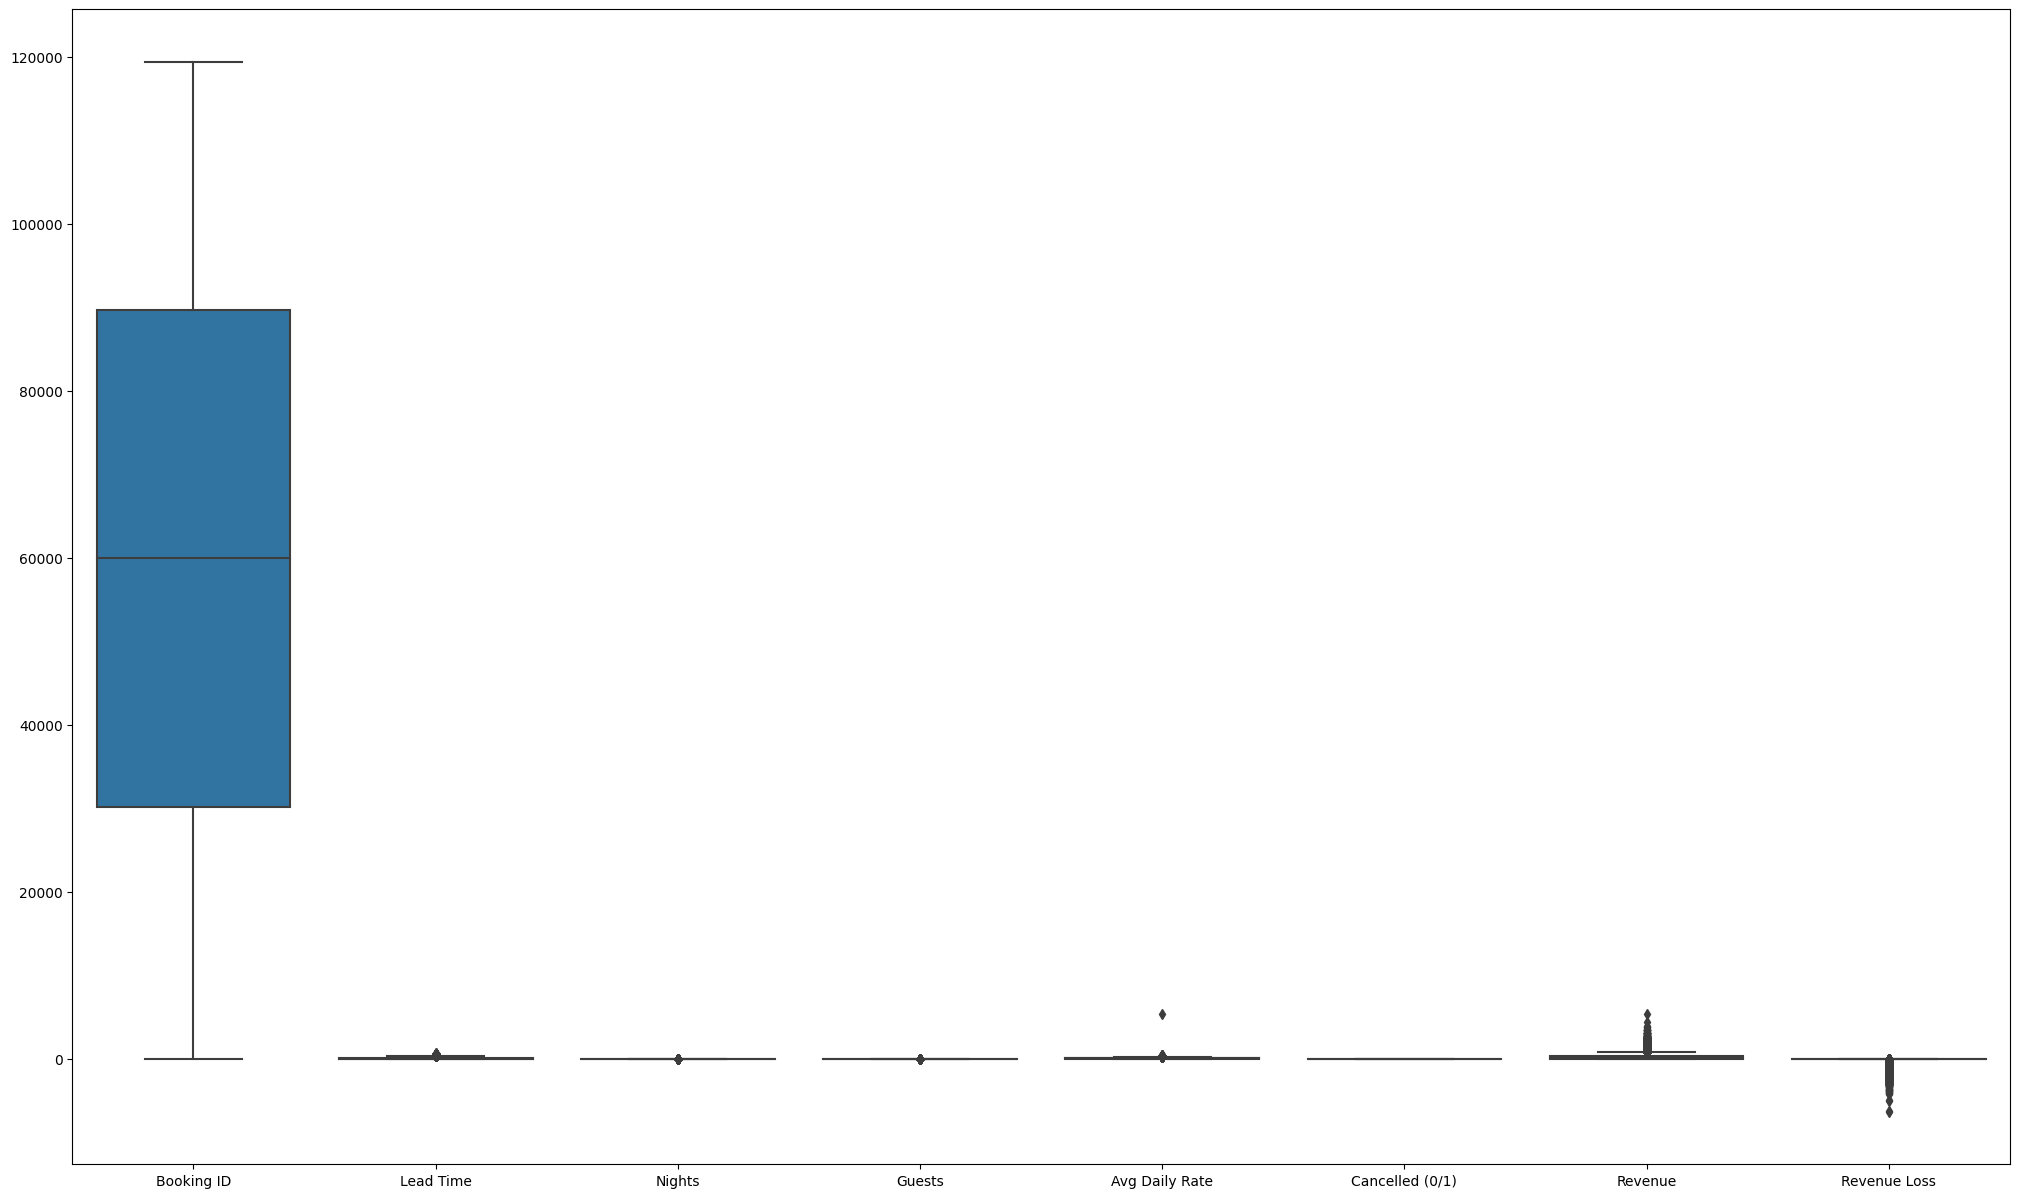

In [16]:
# Boxplot visualization to see if there are outliers
plt.style.use("dark_background")
plt.figure(figsize=(25, 15))
sns.boxplot(df)
plt.show()

We noticed a few outliers on the 'Avg Daily Rate', 'Revenue', and 'Revenue Loss' columns

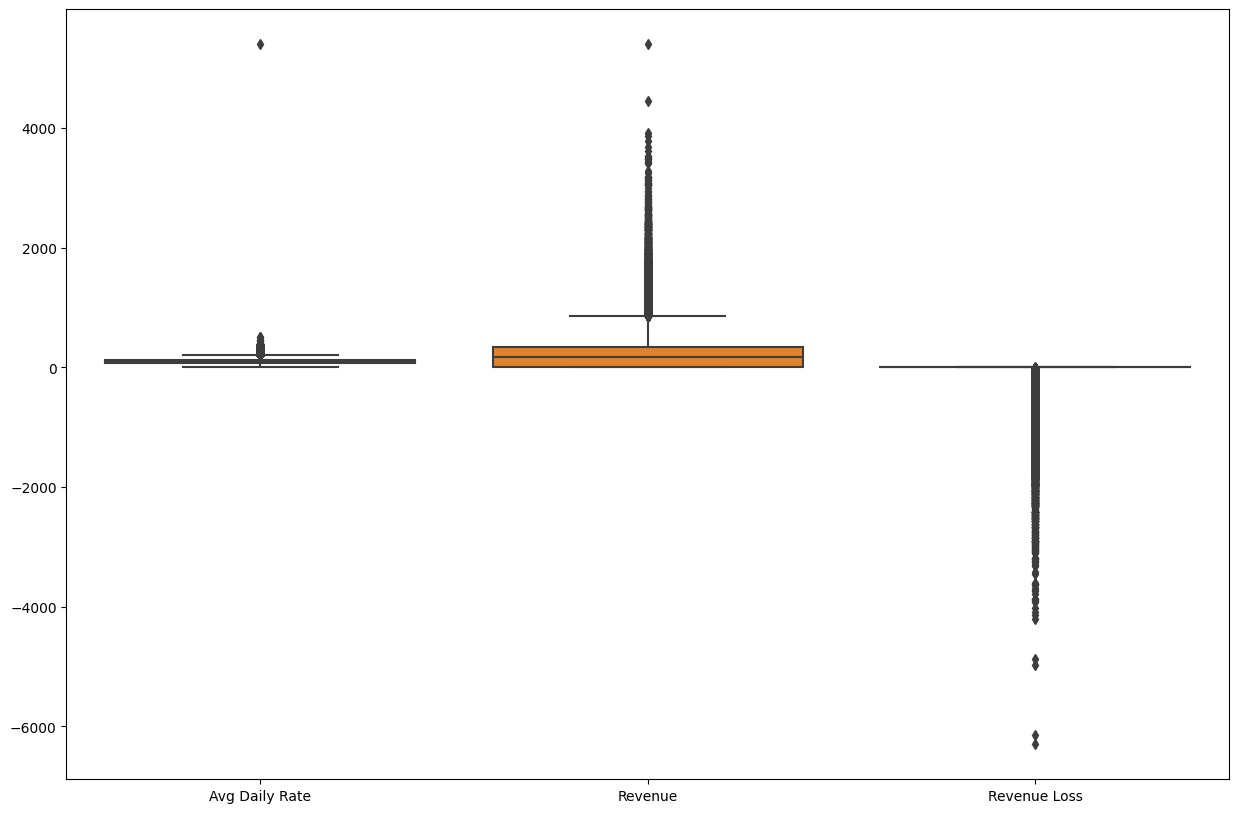

In [17]:
# Better visualization of the columns with outliers
plt.style.use("dark_background")
plt.figure(figsize=(15, 10))
sns.boxplot(df[['Avg Daily Rate', 'Revenue', 'Revenue Loss']])
plt.show()

In [18]:
df.shape

(118901, 17)

In [19]:
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [20]:
columns_of_interest = df[['Avg Daily Rate', 'Revenue', 'Revenue Loss']]

for column in columns_of_interest:
    # Calculate quartiles and IQR for each column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    # Replace outliers with the median value
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

# Display the modified DataFrame
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


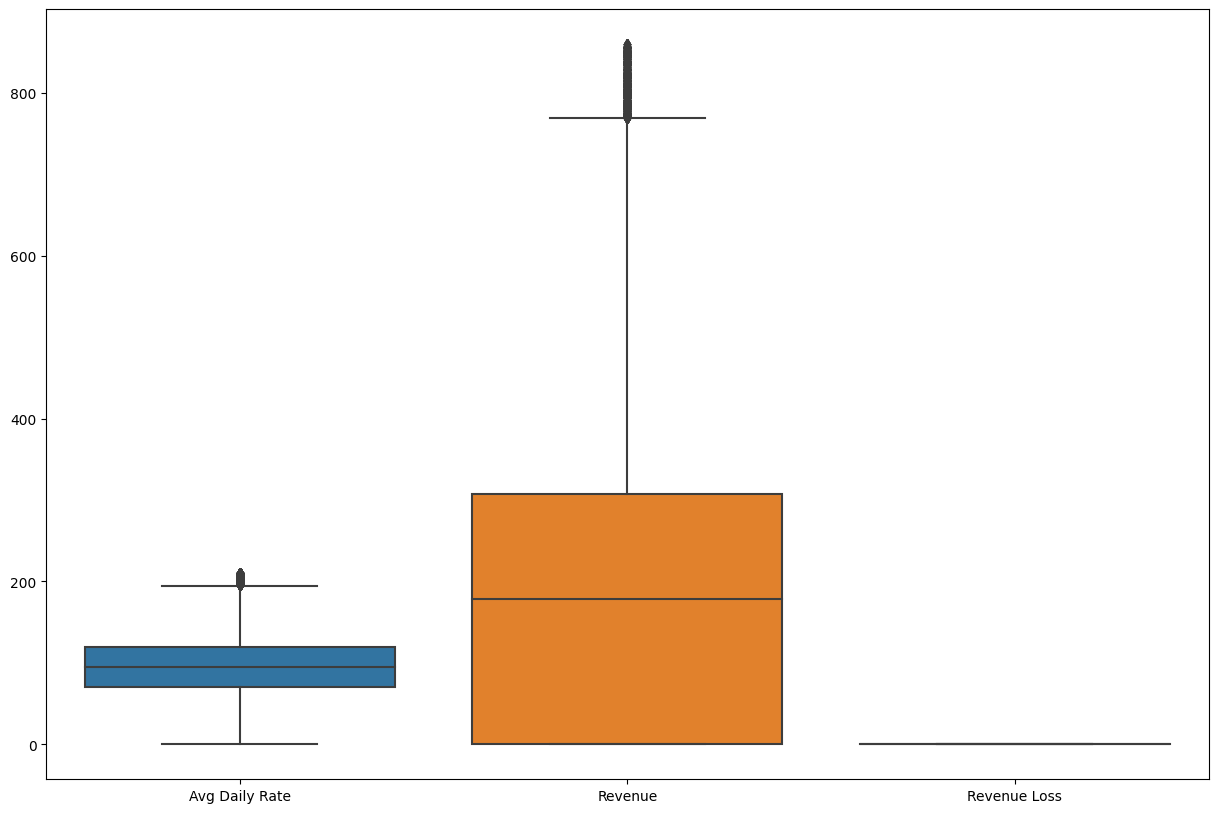

In [22]:
# Better visualization of the columns with outliers
plt.style.use("dark_background")
plt.figure(figsize=(15, 10))
sns.boxplot(df[['Avg Daily Rate', 'Revenue', 'Revenue Loss']])
plt.show()

In [23]:
df.shape

(118901, 17)

### Separating the dates to years and months and days

In [45]:
# List of date column names
date_columns = ['Booking Date', 'Arrival Date', 'Status Update']

# Iterate over each date column
for date_column in date_columns:
    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Extract year, month, and day into separate columns
    df[f'{date_column}_Year'] = df[date_column].dt.year
    df[f'{date_column}_Month'] = df[date_column].dt.month
    df[f'{date_column}_Day'] = df[date_column].dt.day

# Display the modified DataFrame
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Arrival Day,Booking Date_Year,Booking Date_Month,Booking Date_Day,Arrival Date_Year,Arrival Date_Month,Arrival Date_Day,Status Update_Year,Status Update_Month,Status Update_Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,...,1,2014,7,24,2015,7,1,2015,7,1
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,...,1,2013,6,24,2015,7,1,2015,7,1
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,...,1,2015,6,24,2015,7,1,2015,7,2
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,...,1,2015,6,18,2015,7,1,2015,7,2
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,...,1,2015,6,17,2015,7,1,2015,7,3


In [47]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss', 'Arrival Year',
       'Arrival Month', 'Arrival Day', 'Booking Date_Year',
       'Booking Date_Month', 'Booking Date_Day', 'Arrival Date_Year',
       'Arrival Date_Month', 'Arrival Date_Day', 'Status Update_Year',
       'Status Update_Month', 'Status Update_Day'],
      dtype='object')

### Booking Patterns


● What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

● How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

In [48]:
df['Booking Date_Year'].value_counts()

2016    58272
2015    31506
2017    26486
2014     2636
2013        1
Name: Booking Date_Year, dtype: int64

In [46]:
df['Booking Date_Month'].value_counts()

1     16611
2     13402
10    12078
3      9855
7      9798
11     9455
12     9127
4      8569
9      8167
8      7952
5      7839
6      6048
Name: Booking Date_Month, dtype: int64

In [49]:
df['Booking Date_Day'].value_counts()

17    6337
2     4863
4     4856
6     4647
3     4585
25    4289
10    4270
14    4167
9     4119
16    4048
7     3991
20    3967
21    3786
13    3759
19    3748
1     3719
8     3710
15    3692
23    3642
18    3620
12    3610
5     3601
24    3577
11    3496
26    3479
22    3428
28    3325
27    2961
30    2955
29    2951
31    1703
Name: Booking Date_Day, dtype: int64

In [ ]:
df.columns